# KNN Classifier

### Dataset

In [1]:
import numpy as np
from numpy.linalg import norm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
#Load data
iris = pd.read_csv('Iris.csv')
#data cleaning
iris.drop(columns="Id",inplace=True)

In [3]:
#features and labels
X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values

#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

### KNN Classifier Function

In [7]:
# define knn.
class knn:
    """
    Set attributes for KNN Function.
    """
    def __init__(self, n_neighbors = 5, p=2):
        self.n_neighbors = n_neighbors
        self.p = p
        
    # function that returns the suitable label from a set of tied labels.
    def choose_label(self):
        """
        **Input should be of numpy array format**
        tied_labels: labels which are tied.
        nearest_labels: labels of records which are nearest to test sample
        distance_array: distance of test sample from nearest records.
        Output: 
            Relevant label
        """
        # Return a dictionary of labels and their indices.
        labels_idx = {label: np.argwhere(self.nearest_labels == label).ravel() for label in self.tied_labels}
        # Return an array of tied labels and their avg distance.
        labels_dist = np.array([[label, (self.distance_array[label_val]).sum()] for label, label_val in labels_idx.items()])
        # now check if there are any duplicacy in labels avg distances.
        unique_dist, cts = np.unique(labels_dist[:, 1], return_counts = True)
        if np.any(cts - 1):
            # get indexes of minimum distances and their corresponding labels
            min_dist_tied_labels = (labels_dist[:, 0])[np.argwhere(labels_dist[:, 1] == np.argmin(unique_dist)).ravel()]
            return min_dist_tied_labels[np.random.randint(0, len(min_dist_tied_labels))]
        return (labels_dist[:, 0])[np.argmin(labels_dist[:, 1])]
    
    def fit(self, X, y):
        """
        store X and y into self and no fitting as the dataset is the model here...
        """
        self.X = X
        self.y = y
        return self
    
    # define Methods = predict, as there is nothing to fit here.
    def predict(self, x_test):
        """
        x_test: Expected array of 2D, if not expand it dimension.
        """
        if x_test.ndim == 1:
            x_test = np.expand_dims(x_test, 0)
        # empty list.
        test_label = []
        for test_sample in x_test:
            # distance of test sample from all train data points
            dist_diff = norm((self.X - test_sample), self.p, axis = 1)
            # chose n_neighbors minimum distances and return their index
            min_idx = np.argpartition(dist_diff, self.n_neighbors)[:self.n_neighbors]
            # choose the corresponding labels.
            self.nearest_labels = self.y[min_idx]
            # count the occurrences of labels
            unique_labels, counts = np.unique(self.nearest_labels, return_counts = True)
            # sort the counts in decreasing order and obtain the indices...
            counts_idx = np.flip(np.argsort(counts))
            # Arrange the class labels accordingly...
            unique_labels = unique_labels[counts_idx]
            # now check if the entries in counts_idx are unique... if not then there is some tie going on.
            _, counts_of_count = np.unique(counts[counts_idx], return_counts = True)
            if np.any(counts_of_count - 1): #check if any entries in counts have occurences > 1.
                # tied labels
                self.tied_labels = unique_labels[:counts_of_count[0]]# since counts is sorted descending.
                self.distance_array = dist_diff[min_idx]
                # return the suitable one from these tied labels.
                test_label.append(self.choose_label())
            else:
                test_label.append(unique_labels[0])
        return np.array(test_label)

### Train the model

In [17]:
# create an instance of KNN
knn_classif = knn(n_neighbors = 5)
# fit the model...
knn_classif = knn_classif.fit(X_train, y_train)

In [18]:
# Let's predict from the test data.
predictions = knn_classif.predict(X_test).astype(np.object)

### Display confusion matrix

<Figure size 1800x2160 with 0 Axes>

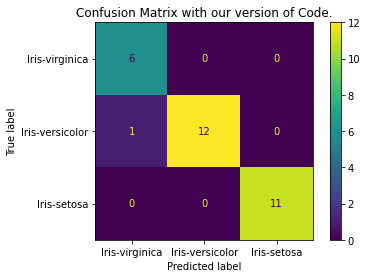

In [19]:
plt.figure(figsize = (25, 30))
cm = confusion_matrix(y_test, predictions, labels=['Iris-virginica', 'Iris-versicolor', 'Iris-setosa'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Iris-virginica', 'Iris-versicolor', 'Iris-setosa'])
disp.plot()
plt.title("Confusion Matrix with our version of Code.")
plt.show()

### Accuracy of constructed KNN on test-set.
$$accuracy = \dfrac{TP + TN}{TP + TN + FP + FN}$$

In [20]:
print("Accuracy on test data: %.3f"%((6+12+11)/(6+12+11+1)))

Accuracy on test data: 0.967


### With Sklearn KNN class, let's see what results we're seeing.

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
# Construct a KNN object
neigh = KNeighborsClassifier(n_neighbors=5)
# fit
neigh.fit(X_train, y_train)
# predict
predictions_sk = neigh.predict(X_test)

<Figure size 1800x2160 with 0 Axes>

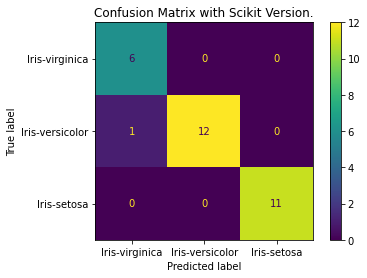

In [52]:
# Lets plot the confusion matrix.
plt.figure(figsize = (25, 30))
cm_sk = confusion_matrix(y_test, predictions_sk, labels=['Iris-virginica', 'Iris-versicolor', 'Iris-setosa'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_sk, display_labels=['Iris-virginica', 'Iris-versicolor', 'Iris-setosa'])
disp.plot()
plt.title("Confusion Matrix with Scikit Version.")
plt.show()

In [53]:
# Again the accuracy...
print("Accuracy on test data with sklearn model: %.3f"%((6+12+11)/(6+12+11+1)))

Accuracy on test data with sklearn model: 0.967
